Linear Regression works well when the target column we're trying to predict the dependent columns is ordered and continuous.If the target column instead contains discrete values, then linear regression isn't a good fit.To solve these types of problems, which are known as classification problem.

Strating with the binary classsification here the only 2 options for values are:

- 0 for the False condition,
- 1 for the True condition.

- Every year high school students and college students apply to various universities and programs,Each student has a unique set of test scores, grades, and backgrounds the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants.

- will try to predict whether an applicant will be admitted to a graduate program in a U.S. university using the concepts of classification. Will be working with data set containing data on 644 applicants with the following columns:


- Gre : scores ranges from 200 to 800
     - applicant's score on the Graduate Record Exam,


- gpa: college grade point average
   - Continuous between 0.0 and 4.0.
  
- admit
  - Binary value, 0 or 1, where 1 means the applicant was admitted to the program 
  
  
  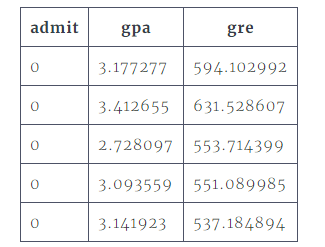

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
admission =pd.read_csv("admissions.csv")
admission.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


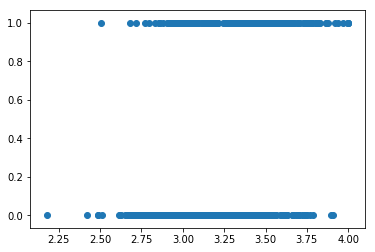

In [2]:
plt.scatter(admission['gpa'],admission['admit'])
plt.show()

#### Logistic Function

The __gpa__ and __admit__ don't have a relationship. The admit column carries the value 0 and 1 used to represent binary value.
When numbers are used to represent different options or categories, they are referred to as categorical values.Classsification focuses on estimating relationship between independent and the dependent, categorical variable.

Logistic regression is a classification technique outputs a probabilty value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to 1 or 0

mathematical representation of the logistic function:

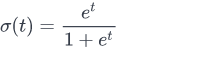

The logistic function is broken up into 2 key parts:

The exponential transformation, transforming all values to be positive:

e^t

- The normalization transformation, transforming all values to range between 0 and 1:

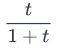


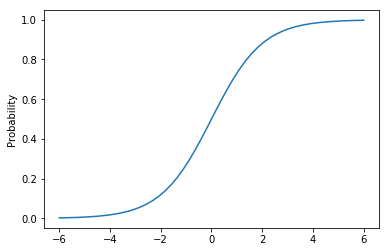

In [3]:
def logistics(x):
    return np.exp(x)  / (1 + np.exp(x)) 
x= np.linspace(-6,6,50, dtype=float)
y= logistics(x)
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

This generated plot above demonstrates that he y-axis values are constrained to range from 0 to 1

####  Training a logistic regression model

In this step fit a logistic regression model to the training data using the scikit-learn library to fit a model between the gpa and admit columns.
- The gpa column contains the GPA of each applicant as a real value between 0.0 and 4.0 and the admit column specifies if that applicant was admitted (0 if not admitted and 1 if admitted).


In [4]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
logistic_model.fit(admission[["gpa"]], admission['admit'])
label=logistic_model.predict(admission[["gpa"]])
admission['predicted_label']= label
print(admission['predicted_label'].value_counts())
print(admission.head())

0    598
1     46
Name: predicted_label, dtype: int64
   admit       gpa         gre  predicted_label
0      0  3.177277  594.102992                0
1      0  3.412655  631.528607                0
2      0  2.728097  553.714399                0
3      0  3.093559  551.089985                0
4      0  3.141923  537.184894                0


C:\Users\Akshaya_Aadithya\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


##### Plotting probabilities

The output of the logical regression model is the probability that the row should be labelled as True or in our case 1.We can use the trained model to return the predicted probability for each row in the training data.

- to return the probability we are goint to use the [predict_proba method](https://scikitlearn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba)

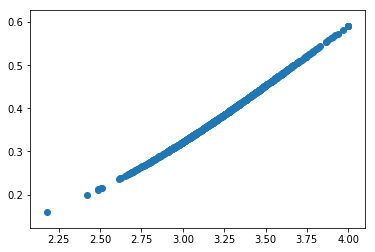

In [5]:
pred_probs = logistic_model.predict_proba(admission[['gpa']])
plt.scatter(admission['gpa'], pred_probs[:,1])

from  the above scatter plot suggests a linear relationship between the gpa values and the probability of being admitted.

#### Accuracy
In logistic resression the model's output 0 and 1 , to decide who gets admitted,need to set a threshold and accepts all the students who exceeds this threshold called discrimnation threshold. The scikit-learns set it to 0.5 by defualt when prediction labels. If the predicted probability is greater than 0.5, the label for that observation is 1. If it is instead less than 0.5, the label for that observation is 0

An accuracy is 1.00 mean its predicted 100% if it is 0.2 means hat the model predicted 20%

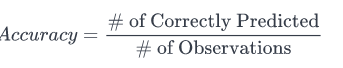

In [7]:
admission['actual_label']=admission['admit']
matches = admission['predicted_label']== admission['actual_label']
correct_predictions = admission[matches]
print(correct_predictions.head())
accuracy = len(correct_predictions) / len(admission)
print(accuracy)

   admit       gpa         gre  predicted_label  actual_label
0      0  3.177277  594.102992                0             0
1      0  3.412655  631.528607                0             0
2      0  2.728097  553.714399                0             0
3      0  3.093559  551.089985                0             0
4      0  3.141923  537.184894                0             0
0.6459627329192547


The accuracy is 64.6%. The accuracy doesnt show how well the model performed on data it was trained on.

#### Binary classification outcomes
By segmenting a model's predictions in to different categories. evaluating binary classification models by testing our model's effectiveness on the training data.

|Prediction	 |   Observation| -            |
|------------|--------------|--------------|
|-            | Admitted (1)|  Rejected (0)|
|------------|-----------------|-------------|
|Admitted (1)	|True Positive (TP)	|False Positive (FP)|
|Rejected (0)	|False Negative (FN)|True Negative (TN)|

In [12]:
true_positives_filter = (admission["predicted_label"]==1) & (admission["actual_label"]==1)

true_positive_count= len(admission[true_positives_filter])

true_negative_filter = (admission['predicted_label'] ==0)&(admission['actual_label']==0)

true_negatives = len(admission[true_negative_filter])

print(true_positive_count)
print(true_negatives)

31
385


#### Sensitivity
Sensitivity or True Positive Rate - The proportion of applicants that were correctly admitted:

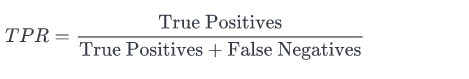

- How effective is this model at identifying positive outcomes?

      If the true positive is low that means the model is not effective catching the positive cases
      
      we want high sensitivity model catches all the positive cases


In [15]:
true_positive_filter = (admission["predicted_label"] == 1) & (admission["actual_label"] == 1)
true_positives = len(admission[true_positive_filter])

false_negative_filter = (admission['predicted_label']== 0)&(admission['actual_label']==1)

false_negatives = len(admission[false_negative_filter])

sensitivity = true_positives/(true_positives + false_negatives)
print(sensitivity)

0.12704918032786885


In [ ]:
sensitivity of the model is around 12.7% 

#### Specificity
Specificity or True Negative Rate - The proportion of applicants that were correctly rejected:

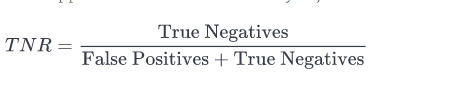


How effective is this model at identifying negative outcomes?

- A high specificity means that the model is really good at predicting which applicants should be rejected

In [21]:
true_positive_filter = (admission["predicted_label"] == 1) & (admission["actual_label"] == 1)
true_positives = len(admission[true_positive_filter])
false_negative_filter = (admission["predicted_label"] == 0) & (admission["actual_label"] == 1)
false_negatives = len(admission[false_negative_filter])
true_negative_filter = (admission["predicted_label"] == 0) & (admission["actual_label"] == 0)
true_negatives = len(admission[true_negative_filter])


false_positives_filter = (admission['predicted_label']==1) & (admission['actual_label']==0)
false_positives= len(admission[false_positives_filter])

specificity = true_negatives /(true_negatives + false_positives)
print(specificity)                                                       

0.9625


The specificity of the model is 96.25%. This means that the model is really good at knowing which applicants to reject